# Mixture model

We create a dataset that is sampled from the mixture model. The sampling procedure looks like this:

- first sample a component id according to prior distribution $\pi(\cdot)$
- then choose the corresponding gaussian distribution, and sample from that gaussian


In [3]:
%matplotlib inline  

import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm_notebook as tqdm
from sklearn.cluster import KMeans

In [4]:
def plot_scatter(samples, ids):
    colors = np.zeros((len(ids), 3))
    choices = [[0, 0, 1], [0, 1, 0], [1, 0, 0]]
    num_points = []
    for i in range(3):
        num_points.append(np.sum(ids == i))
    maps = np.argsort(num_points)
    for i in range(3):
        colors[np.where(ids == maps[i]), :] = choices[i]
    plt.scatter(samples[:, 0], samples[:, 1], s=1, color=colors)
    plt.axis('equal')

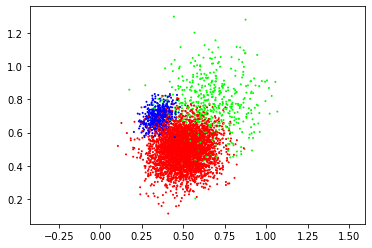

In [7]:
def gmm_sampling(num_samples, pi, mu, sigma):
    """
    Args:
        num_samples: number of samples required
        pi: np array of length K, the prior distribution, where K is # components
        mu: KxD np array, the center for each gaussian, where D is data dimension
        sigma: KxDxD np array, the standard deviation cov for each gaussian
    Return:
        samples: NxD np array, the result samples
        ids: np array of length N, the component id for each sample
    """    
    # obtain the shapes
    K = mu.shape[0]  # nb of components (pi)
    D = mu.shape[1]  # data dimension
    N = num_samples

    samples = np.zeros((N,D))
    ids = np.zeros(N)

    for i in range(0,N):
        # choose component
        r = np.random.uniform(0,1)
        if r <= pi[0]:
            index = 0
        elif r <= pi[0]+pi[1]:
            index = 1
        else:
            index = 2
        ids[i] = index

        # sample from Gaussian
        mean = mu[index,:]
        cov = sigma[index,:]**2
        samples[i,:] = np.random.multivariate_normal(mean, cov)

    return samples,ids

pi = np.array([0.8, 0.1, 0.1])
mu = np.array([[0.5, 0.5], 
               [0.35, 0.7], 
               [0.65, 0.75]], dtype=np.float32)
sigma = np.array(
    [
        [[0.1, 0.02],
        [0.02, 0.1]],
        
        [[0.05, 0.03],
        [0.03, 0.05]],
        
        [[0.15, 0.04],
        [0.04, 0.15]]            
    ],)
k = pi.shape[0]

X, ids = gmm_sampling(5000, pi, mu, sigma)
plot_scatter(X, ids)

Kmeans

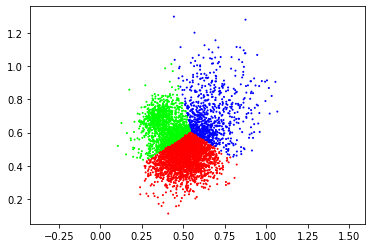

In [11]:
km = KMeans(n_clusters=k, random_state=0).fit(X)
plot_scatter(X, km.labels_)